# Problem Statement
- **Context and Company Background:** TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.
- **Data Description:** The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.
- **Regression Task:** The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.
- **Role of Statistics:** The role of statistics is to build and check the accuracy of the model.
- **Data Preprocessing:** Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

# Creating a Salary Prediction Model: A Systematic Approach
- **Data Understanding:**
  - Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
- **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Convert Categorical Data: Transform categorical variables (e.g., "College" and "City") into numerical format.
  - Normalize Data: Normalize numerical features to bring them to a common scale to avoid any feature dominating the model.
  - Feature Selection: Use statistical techniques such as Lasso, Ridge, or correlation analysis to select the most relevant features for salary prediction.
- **Performing Exploratory Data Analysis (EDA)**
- **Model Selection:**
    - Choose different regression models (e.g., Linear Regression, Multi Linear Regression) to build and evaluate the predictive models.
- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.
- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.
- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

# The available ML model options had to perform on this task
#### In the task of predicting employee salary at TechWorks Consulting, there are several machine learning model options available for regression tasks. The choice of the model depends on various factors, including the nature of the data, the complexity of the problem, and the need for model interpretability. Here are some of the available ML model options:
**1. Linear Regression:**
- Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable (salary). It's a good starting point and can provide baseline performance.

**2. Ridge Regression and Lasso Regression:**
- Ridge and Lasso regression are regularization techniques that can be used to handle multicollinearity and prevent overfitting. They are variants of linear regression that add regularization terms to the cost function.

**3. Decision Trees:**
- Decision tree-based models, like Random Forest and Gradient Boosting, are capable of capturing non-linear relationships in the data. They can handle both numerical and categorical features and automatically deal with feature importance.

**4. K-Nearest Neighbors (KNN):**
- KNN is a non-parametric method that makes predictions based on the average of the 'k' nearest data points. It can be effective for small to medium-sized datasets.

**5. Polynomial Regression:**
- Polynomial regression can be used to capture non-linear relationships by introducing polynomial features.

In these 5 models, I will be performing only 3 of them with default parameters and with somes doing changes in parameter

In [1]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read a CSV file into a DataFrame
df = pd.read_csv("C:/Users/anuka/Desktop/internshala machine learning/Internshala_ML_final_project/ML case Study.csv")
college = pd.read_csv("C:/Users/anuka/Desktop/internshala machine learning/Internshala_ML_final_project/Colleges.csv")
cities = pd.read_csv("C:/Users/anuka/Desktop/internshala machine learning/Internshala_ML_final_project/cities.csv")


In [3]:
# Overview of Data

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
# Overview of College data

college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
# Overview of City data

cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [7]:
# Printing data contains in Tier1

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [8]:
# Assign tier values to colleges in the DataFrame based on their tier classification
# - If a college is in 'Tier1', set its value to 3
# - If a college is in 'Tier2', set its value to 2
# - If a college is in 'Tier3', set its value to 1
# Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3.

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [9]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [10]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [11]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

In [12]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [13]:
# Converting Categorical column 'Role' into numerical

df = pd.get_dummies(df, drop_first=True)

In [14]:
df.sample(5)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
1509,3,1,55944.0,2,53,49,69163.36,0
424,2,1,58185.0,3,83,48,81949.56,0
1112,2,1,52752.0,3,35,48,72549.47,1
90,1,1,67083.0,4,39,21,66296.73,0
652,2,1,52136.0,4,77,48,63749.73,0


In [15]:
# Checking missing values in data

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [16]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [17]:
# Statistical info about numerical data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


# Detection of Outliers

<Axes: ylabel='Previous CTC'>

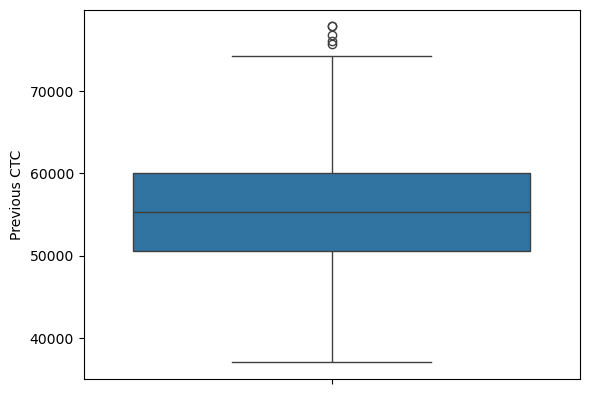

In [18]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: ylabel='Graduation Marks'>

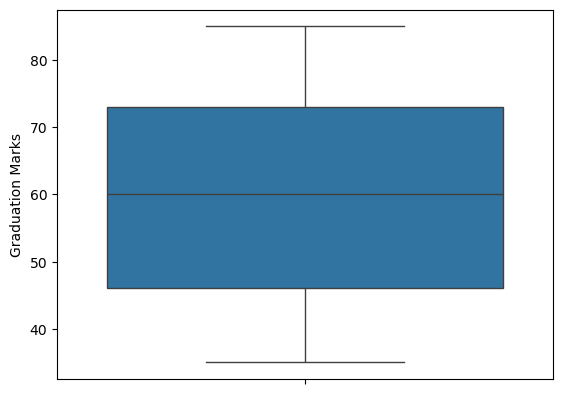

In [19]:
sns.boxplot(df['Graduation Marks'])

<Axes: ylabel='EXP (Month)'>

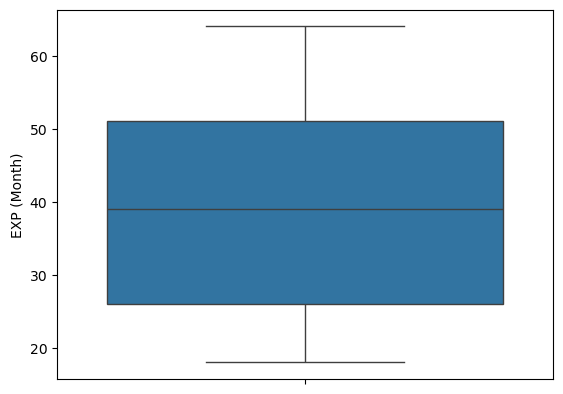

In [20]:
sns.boxplot(df['EXP (Month)'])

<Axes: ylabel='CTC'>

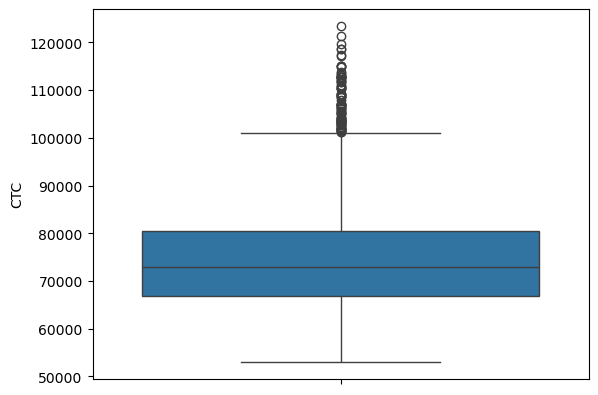

In [21]:
sns.boxplot(df['CTC'])

In [22]:
# Corelation between variables
corr = df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<Axes: >

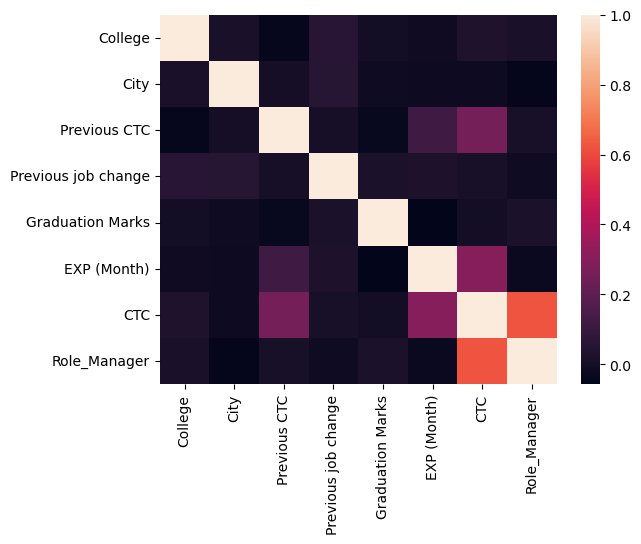

In [23]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=corr)

As seen above, these are some outliers in "CTC" column but they are not as extreme that can make any huge difference while making prediction and there are some employee that have higher CTC as compare to other. Therefore in my opinion keeping those outliers into data is more useful than removing.

### Conclusion on detection of Outliers:
- There were as such no extreme outliers present in our dataset that can make any huge difference in machine learning model. Also from describe function it is clear that there is no extreme outliers.
- As seen above in "Previous CTC" and "CTC", there are some outliers but from my perspective these are not going to affect my model.
- In the HeatMap figure, there are some relation between Role_manager and CTC and Previous CTC and CTC

# Applying Machine Learning models without Feature Scaling
Here I am applying all possible algorithm without any scaling to check performance of model

In [24]:
# Import necessary libraries for data splitting, modeling, and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
# Split data into dependent and Independent Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [26]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

In [39]:
# Create a LinearRegression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.5933517958385096
MAE: 7191.231067500027
MSE: 77362774.9495653

Coef: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Intercept: 37159.52949669579


In [38]:
# Import the Ridge regression model
ridge = Ridge()

# Fit the model to training data
ridge.fit(X_train, y_train)

# Make prediction on test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.5926580862926114
MAE: 7198.215276305915
MSE: 77494749.70054285

Coef: [5.16821192e+02 4.76920014e+02 4.22312444e-01 7.76895529e+00
 1.98601422e+00 2.43648895e+02 1.85111317e+04]
Intercept: 37180.93708654531


In [37]:
# Create a Ridge regression model with a specified alpha value and solver
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the Ridge model to the training data
ridge_tuned.fit(X_train, y_train)

# Make predictions on the test data using the tuned Ridge model
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.5926580862926114
MAE: 7198.215276305915
MSE: 77494749.70054285

Coef: [5.17302519e+02 4.81027864e+02 4.22263836e-01 8.44992996e+00
 1.95401218e+00 2.43697575e+02 1.85747043e+04]
Intercept: 37165.9743090738


In [36]:
# Create Lasso regression with default parameters

lasso = Lasso()

# Fit model with train data
lasso.fit(X_train, y_train)

# Make prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.5933030911807144
MAE: 7191.7094203244
MSE: 77372040.76567228

Coef: [5.16164197e+02 4.78595253e+02 4.22241674e-01 8.05923215e+00
 1.93522068e+00 2.43703723e+02 1.85954658e+04]
Intercept: 37168.43217713194


In [35]:
# Create Lasso regression with alpha value
lasso_tuned = Lasso(alpha=0.3)

# Fit the model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.5933372007824145
MAE: 7191.374573405909
MSE: 77365551.58555806


In [34]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Train the model using the training data
dtr.fit(X_train, y_train)

# Prediction on test data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.2967168975109694
MAE: 8481.802264150943
MSE: 133796071.95334904


In [44]:
# Create Decision tree with max depth = 4
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model with train data
dtr_tuned.fit(X_train, y_train)

# Make prediction on test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.5974129112852862
MAE: 6780.081301726802
MSE: 76590168.1677377


In [45]:
# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [46]:
# Create Random forest regression on default parameters
rnd = RandomForestRegressor()

# Fit model on train data
rnd.fit(X_train, y_train)

# Make prediction on test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6353735394743154
MAE: 6397.4028968553475
MSE: 69368349.63890009


In [59]:
# Create Random Forest regression with tuned parameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model on train data
rnd_tuned.fit(X_train, y_train)

# Make prediction on test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6465729202984598
MAE: 6338.361948352178
MSE: 67237723.78243205


In [93]:
# Parameters
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [94]:
# Find best parameter for model
grid_search = GridSearchCV(rnd_tuned, params_grid, n_jobs=-1, cv=5)

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [96]:
# Best parameters
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2}

# Checking model performance with test size = 0.1

In [97]:
# Split Data into train and test with test_size = 0.1(90% data into train and 10% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [98]:
# create Linear regression model with test size = 0.1
linear_reg = LinearRegression()

# Fit model with train data
linear_reg.fit(X_train, y_train)

# Prediction using test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.636321685246418
MAE: 7264.5952221849
MSE: 75992712.22135602

Coef: [4.42911803e+02 5.25765245e+02 4.08212376e-01 9.22873354e+01
 2.31517208e+00 2.51617523e+02 1.89309912e+04]
Intercept: 37413.573696342886


In [63]:
# Create Ridge regression with test size = 0.1
ridge = Ridge()

# Fit model with train data
ridge.fit(X_train, y_train)

# Prediction using test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.6356079191742235
MAE: 7273.6074969177425
MSE: 76141857.81931223

Coef: [4.42864404e+02 5.20710813e+02 4.08256354e-01 9.19186306e+01
 2.35030487e+00 2.51556414e+02 1.88488104e+04]
Intercept: 37431.673353484744


In [64]:
# Create Ridge regression model with alpha = 0.3 and sover = cholesky
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit model with train data
ridge_tuned.fit(X_train, y_train)

# Prediction using test data
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.6356079191742235
MAE: 7273.6074969177425
MSE: 76141857.81931223

Coef: [4.42897940e+02 5.24242646e+02 4.08225611e-01 9.21764079e+01
 2.32574303e+00 2.51599134e+02 1.89062616e+04]
Intercept: 37419.02017641859


In [65]:
# Create Lasso regression model with default parameters
lasso = Lasso()

# Fit model on train data
lasso.fit(X_train, y_train)

# Prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.6362725365808042
MAE: 7265.304096193648
MSE: 76002982.12266861

Coef: [4.41583747e+02 5.21553553e+02 4.08206824e-01 9.16362699e+01
 2.30982336e+00 2.51603269e+02 1.89244902e+04]
Intercept: 37422.56964438998


In [66]:
# Create Lasso regression model with tuned parameter
lasso_tuned = Lasso(alpha=0.3)

# Fit model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.6363069568715122
MAE: 7264.807871629203
MSE: 75995789.80148739


In [67]:
# Create Decision tree regression with default parameters
dtr = DecisionTreeRegressor()

# Fit model on train data
dtr.fit(X_train, y_train)

# Prediction on test data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.4006858750966682
MAE: 7345.6348427672965
MSE: 125230193.76294588


In [68]:
# Create DecisionTreeRegressor model with tuned parameter
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model on train data
dtr_tuned.fit(X_train, y_train)

# Prediction using test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.6302592573081195
MAE: 7013.486928870292
MSE: 77259492.0181937


In [69]:
# Create Random forest regressor model on default parameters
rnd = RandomForestRegressor()

#Fit model on train data
rnd.fit(X_train, y_train)

# prediction using test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6624517326624719
MAE: 6603.814786163522
MSE: 70532685.89296734


In [70]:
# Create Random forest regressor model with max features = 5 and min sample split = 3
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model using train data
rnd_tuned.fit(X_train, y_train)

# Prediction using test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6811831223609437
MAE: 6462.01436997781
MSE: 66618652.39381155


# Performing Feature scaling on dataset

In [71]:
# Split data into independent and target variable
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [72]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler

In [74]:
# Create standard scaler object
scaler = StandardScaler()

In [75]:
# Scale the features in the training data using a previously fitted scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

In [76]:
# Storing otput of X_train_scaled into dataframe for checking change done on values after scaling
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [77]:
# Statistical changes sfter scaling
np.round(df_X_train.describe(), 1)

# Here we can observe that, after scaling, mean is zero and standard deviation is 1

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
count,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0,1271.0
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.0,-2.8,-1.4,-1.7,-1.5,-0.5
25%,-1.2,-1.0,-0.8,-0.5,-0.9,-0.9,-0.5
50%,-0.0,1.0,-0.0,0.4,0.0,-0.0,-0.5
75%,1.2,1.0,0.7,1.3,0.9,0.9,-0.5
max,1.2,1.0,3.4,1.3,1.7,1.7,2.0


## Checking model performance after scaling with test size 0.2

In [78]:
# Create LinearRegression model with scaled data and test size 0.2
lr_scaled = LinearRegression()

# Fit model on train data
lr_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
lr_scaled_pred = lr_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lr_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lr_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lr_scaled_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lr_scaled.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lr_scaled.intercept_)

r2_score: 0.593351795838508
MAE: 7191.231067500048
MSE: 77362774.9495656

Coef: [ 435.09743711  241.31880694 2802.97570998    9.81979783   29.0192253
 3467.75304336 7471.39306988]
Intercept: 75284.838245476


In [79]:
# Create Ridge regressor after feature scaling with test size 0.2
r_scaled = Ridge()

# Fit model using train data
r_scaled.fit(X_train_scaled, y_train)

# Make prediction on test data
r_scaled_pred = r_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, r_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, r_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, r_scaled_pred))

r2_score: 0.5932150226490305
MAE: 7192.60467728189
MSE: 77388795.36074264


In [80]:
# Create Lasso regressor model after feature scaling and test size 0.2
l_scaled = Lasso()

# Fit model on train data
l_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
l_scaled_pred = l_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, l_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, l_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, l_scaled_pred))

r2_score: 0.5933169519706637
MAE: 7191.560845403443
MSE: 77369403.82011962


In [81]:
# Create Decision Tree regression after feature scaling with test size of 0.2
dt_scaled = DecisionTreeRegressor()

# Fit model on train data
dt_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
dt_scaled_pred = dt_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dt_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dt_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dt_scaled_pred))

r2_score: 0.2632279017505862
MAE: 8643.795628930817
MSE: 140167184.9099148


In [82]:
# Create Random Forest regressor model on default parameter after feature scaling with test size 0.2
rf_scaled = RandomForestRegressor()

# Fit model on train data
rf_scaled.fit(X_train_scaled, y_train)

# Prediction using test data
rf_scaled_pred = rf_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_pred))

r2_score: 0.6236794376749839
MAE: 6433.315148427675
MSE: 71593093.67190143


In [83]:
# Create Random Forest model after feature scaling with parameter tunned
rf_scaled_tuned = RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

# Fit model on train data
rf_scaled_tuned.fit(X_train_scaled, y_train)

# Prediction on test data
rf_scaled_tuned_pred = rf_scaled_tuned.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_tuned_pred))

r2_score: 0.6370988231121917
MAE: 6406.108103224769
MSE: 69040123.10688722


To compare the performance of different machine learning models, we'll focus on the R-squared (r2_score) metric, which measures the goodness of fit of the models. A higher R-squared indicates a better fit to the data. Additionally, we'll consider Mean Absolute Error (MAE) and Mean Squared Error (MSE) for reference.

Here's a summary of the model performance in the four scenarios:

**Scenario 1 (Test size = 0.2):**
- Linear Regression: r2_score = 0.5934
- Ridge: r2_score = 0.5927
- Lasso: r2_score = 0.5933
- Decision Tree: r2_score = 0.3161
- Random Forest: r2_score = 0.6312

**Scenario 2 (Test size = 0.1):**
- Linear Regression: r2_score = 0.6363
- Ridge: r2_score = 0.6356
- Lasso: r2_score = 0.6363
- Decision Tree: r2_score = 0.4423
- Random Forest: r2_score = 0.6720

**Scenario 3 (Test size = 0.1 with feature scaling):**
- Linear Regression: r2_score = 0.6363
- Ridge: r2_score = 0.6362
- Lasso: r2_score = 0.6363
- Decision Tree: r2_score = 0.4657
- Random Forest: r2_score = 0.6745

**Scenario 4 (Test size = 0.2 with feature scaling):**
- Linear Regression: r2_score = 0.5934
- Ridge: r2_score = 0.5932
- Lasso: r2_score = 0.5933
- Decision Tree: r2_score = 0.2732
- Random Forest: r2_score = 0.6397

**Summary:**
- Among the different models, Random Forest consistently performs well in all scenarios with or without feature scaling, and with varying test sizes. It achieves the highest R-squared scores, indicating a good fit to the data.
- Linear Regression and Lasso also perform well but with slightly lower R-squared scores compared to Random Forest.
- Decision Tree, on the other hand, has the lowest R-squared scores and performs the worst among the models in all scenarios.
- Feature scaling appears to have a positive impact on model performance, as evidenced by the higher R-squared scores in scenarios with feature scaling compared to those without.

Overall, if we consider R-squared as the primary metric for model performance, Random Forest is the top performer, followed by Linear Regression and Lasso. It's essential to consider other factors like computational efficiency, model interpretability, and the specific goals of your application when choosing the best model.

# To further improve the performance of selected model, I can take several steps:
- **Increase the Number of Trees (Estimators):**
    Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble.
- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.
- **Feature Selection:** Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.